In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wego = pd.read_csv('../data/wego_data.csv')

In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

### Question 1: What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [4]:
(
    wego
    [[
        
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    
).head()

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1
4,2023-08-01 05:15:00,2023-08-01 05:16:35,-1.583333,0,0,1


plan: % of ontime vs. not ontime
% of early vs ontime
% of late vs ontime
check that all rows add to sum of 1

In [5]:
wego.ADJUSTED_ONTIME_COUNT.value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [6]:
wego.ADJUSTED_ONTIME_COUNT.count()

350329

In [7]:
wego.ADJUSTED_ONTIME_COUNT.value_counts(normalize=True)

ADJUSTED_ONTIME_COUNT
1    0.770841
0    0.229159
Name: proportion, dtype: float64

### 77% on time

In [8]:
wego['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    340554
1      9775
Name: count, dtype: int64

In [9]:
wego['ADJUSTED_EARLY_COUNT'].count()

350329

In [10]:
wego['ADJUSTED_EARLY_COUNT'].value_counts(normalize=True)

ADJUSTED_EARLY_COUNT
0    0.972098
1    0.027902
Name: proportion, dtype: float64

### 2.8% of trips were early

In [11]:
wego['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    291291
1     59038
Name: count, dtype: int64

In [12]:
wego['ADJUSTED_LATE_COUNT'].count()

350329

In [13]:
wego['ADJUSTED_LATE_COUNT'].value_counts(normalize=True)

ADJUSTED_LATE_COUNT
0    0.831478
1    0.168522
Name: proportion, dtype: float64

### 16.9% of trips were late 

In [14]:
#trips not accounted for in late & early columns??
9775 + 59038

68813

(-10.0, 10.0)

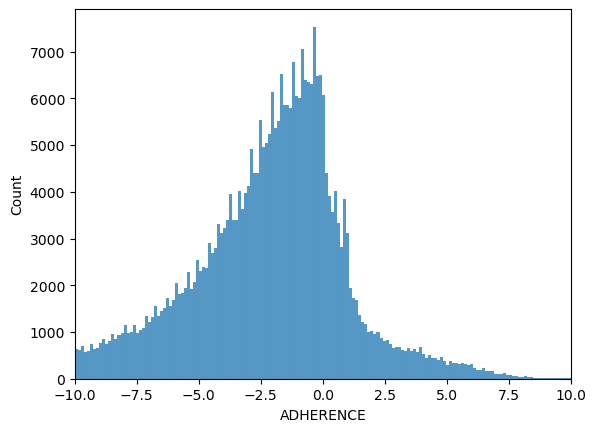

In [15]:
sns.histplot(data=wego, x='ADHERENCE')
plt.xlim(left=-10, right=10)

In [16]:
wego['ADHERENCE'].min()

-948.533333

In [17]:
wego['ADHERENCE'].max()

88.383333

In [18]:
wego['ADHERENCE'].value_counts().sort_values(ascending=False)

ADHERENCE
 0.966666      1355
 0.950000      1341
-0.166666      1082
-0.200000      1042
-0.100000      1033
               ... 
-128.100000       1
-128.550000       1
-125.066666       1
-115.900000       1
 13.366666        1
Name: count, Length: 3765, dtype: int64

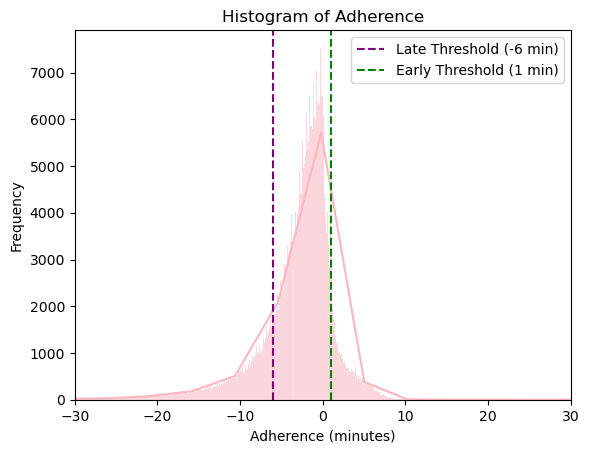

In [19]:
sns.histplot(wego['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

(-30.0, 30.0)

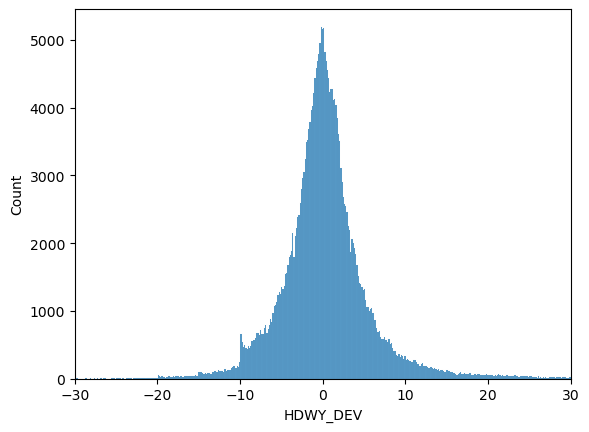

In [20]:
#this doesn't give accurate info
sns.histplot(data=wego, x='HDWY_DEV')
plt.xlim(left=-30, right=30)

#next time: add column in dataset for calculated headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY, then use that to make chart, with indicator lines for 50% and 150% like above

In [21]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [23]:
wego['hdwy_dev_pct'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']

In [25]:
wego[['HDWY_DEV', 'SCHEDULED_HDWY', 'hdwy_dev_pct' ]]

,HDWY_DEV,SCHEDULED_HDWY,hdwy_dev_pct
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
350324,5.266666,30.0,0.175556
350325,NaN,NaN,NaN
350326,1.866666,30.0,0.062222
350327,17.500000,30.0,0.583333


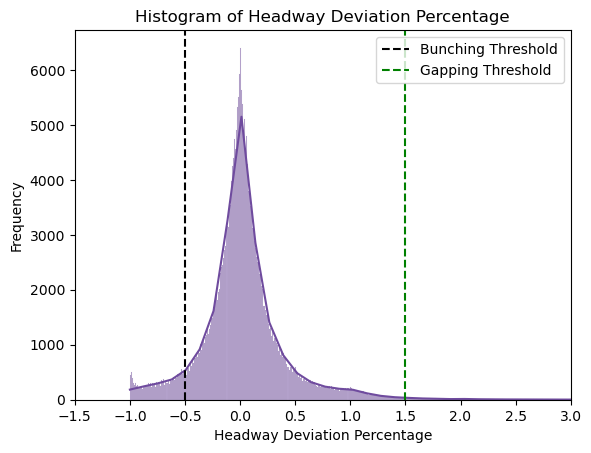

In [80]:
sns.histplot(data=clean_hdway, x='hdwy_dev_pct', kde=True, color='#6F4B9E')
plt.title('Histogram of Headway Deviation Percentage')
plt.xlabel('Headway Deviation Percentage')
plt.ylabel('Frequency')
plt.axvline(x=-0.5, color='black', linestyle='--', label='Bunching Threshold')  # Adding a line indicating early threshold
plt.axvline(x=1.5, color='green', linestyle='--', label='Gapping Threshold')  # Adding a line indicating late threshold
plt.xlim(left=-1.5, right=3)
plt.legend()

### Q2. How does direction of travel, route, or location affect the headway and on-time performance?

In [32]:
#direction of travel: 'ROUTE_DIRECTION_NAME'
wego['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [34]:
#finding any null values
wego['ROUTE_DIRECTION_NAME'].isnull().value_counts()

ROUTE_DIRECTION_NAME
False    350329
Name: count, dtype: int64

In [75]:
#fixing unclean headway data:
clean_hdway = (
    wego
    .loc[wego['SCHEDULED_HDWY']!=0])

clean_hdway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,0.175556
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,0.062222
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,0.583333


In [85]:
clean_hdway.hdwy_dev_pct.describe()

count    265847.000000
mean          0.031625
std           0.466668
min          -1.000000
25%          -0.141667
50%           0.001754
75%           0.155000
max          24.175000
Name: hdwy_dev_pct, dtype: float64

In [78]:
clean_hdway.groupby('ROUTE_DIRECTION_NAME').agg({'hdwy_dev_pct':['mean', 'min', 'max']})

hdwy_dev_pct                
                             mean  min        max
ROUTE_DIRECTION_NAME                             
FROM DOWNTOWN            0.036886 -1.0  24.175000
TO DOWNTOWN              0.025648 -1.0  21.753333

In [61]:
#finding unclean data
# (
#     wego
#     .loc[wego['hdwy_dev_pct']>100]
#     [['hdwy_dev_pct','HDWY_DEV','SCHEDULED_HDWY']] 
# )

,hdwy_dev_pct,HDWY_DEV,SCHEDULED_HDWY
46637,inf,11.416666,0.0
46643,inf,0.650000,0.0
48742,inf,6.983333,0.0
55236,inf,3.800000,0.0
55250,inf,0.066666,0.0
61749,inf,0.583333,0.0
76138,inf,1.266666,0.0
95638,inf,9.683333,0.0
99700,inf,0.300000,0.0
100038,inf,2.050000,0.0


In [81]:
#108 rows where scheduled headway = 0 ; all have trip edge of 1
#this is the problem with the highway deviation % data

# (
#     wego
#     .loc[wego['SCHEDULED_HDWY']==0]
#     .loc[wego['TRIP_EDGE']==1]
#     [['ROUTE_ABBR', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
#       'SCHEDULED_TIME', 'SCHEDULED_HDWY',
#       'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV', 'hdwy_dev_pct', 'OPERATOR']] 
# )

,ROUTE_ABBR,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,hdwy_dev_pct,OPERATOR
42265,50,2023-08-08,351236,MLKS,TO DOWNTOWN,1,2023-08-08 15:10:00,0.0,2023-08-08 15:11:58,NaN,NaN,NaN,2586
46637,55,2023-08-08,353988,ARTS,TO DOWNTOWN,1,2023-08-08 15:12:00,0.0,2023-08-08 15:14:13,11.416666,11.416666,inf,2547
46643,56,2023-08-08,354106,MEIG,TO DOWNTOWN,1,2023-08-08 15:20:00,0.0,2023-08-08 15:23:34,0.650000,0.650000,inf,2603
48742,50,2023-08-09,351236,MLKS,TO DOWNTOWN,1,2023-08-09 15:10:00,0.0,2023-08-09 15:11:32,6.983333,6.983333,inf,2586
48756,56,2023-08-09,351239,MEIG,TO DOWNTOWN,1,2023-08-09 15:20:00,0.0,2023-08-09 15:20:20,NaN,NaN,NaN,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339622,55,2023-09-28,353988,ARTS,TO DOWNTOWN,1,2023-09-28 15:12:00,0.0,2023-09-28 15:14:54,NaN,NaN,NaN,2821
339628,56,2023-09-28,354106,MEIG,TO DOWNTOWN,1,2023-09-28 15:20:00,0.0,2023-09-28 15:22:34,2.283333,2.283333,inf,1880
341727,50,2023-09-29,351236,MLKS,TO DOWNTOWN,1,2023-09-29 15:10:00,0.0,2023-09-29 15:17:54,8.850000,8.850000,inf,1889
346163,55,2023-09-29,353988,ARTS,TO DOWNTOWN,1,2023-09-29 15:12:00,0.0,2023-09-29 15:14:34,0.150000,0.150000,inf,1598


In [82]:
clean_hdway.hdwy_dev_pct.isnull().value_counts()

hdwy_dev_pct
False    265847
True      84374
Name: count, dtype: int64

In [83]:
clean_hdway['HDWY_DEV'].isnull().value_counts()

HDWY_DEV
False    265847
True      84374
Name: count, dtype: int64

In [84]:
clean_hdway['SCHEDULED_HDWY'].isnull().value_counts()

SCHEDULED_HDWY
False    274630
True      75591
Name: count, dtype: int64